## Read in Libraries

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore') 

## Defining import / export file paths

In [2]:
# STUDENT INPUT REQUIRED - Modify path directly below for location of the 05a. YouTube - Outliers - Raw data.csv file on your laptop/desktop
raw_data_path = r'C:\Users\drvis\Downloads\MMM-2\05a. YouTube - Outliers - Raw data.csv'

export_data_path = 'C:/Users/drvis/Downloads/MMM-2/Processed Data/'
file_name = 'final_youtube.csv'

## Read in Video YouTube Impressions Data

In [3]:
# The code uses Python and the Pandas library to load data from a CSV file specified by raw_data_path into a Pandas DataFrame called df_outlier.
df_outlier = pd.read_csv(raw_data_path)

# STUDENT INPUT REQUIRED - Write code that returns the data types of df_outlier - HINT: see how this was done in separate Facebook python script

print(df_outlier.dtypes)

week_starting_date     object
youtube_video_imp     float64
dtype: object


In [4]:
# In this code, we convert the "week_starting_date" column of the df_outlier DataFrame to datetime format using the pd.to_datetime() function.
# This makes it easier to work with and manipulate dates in future analyses.
# Once the conversion is complete, we use the head() function to display the first few rows of df_outlier.
# This helps us confirm that the datetime conversion was successful and provides a preview of the DataFrame after the change.

df_outlier['week_starting_date'] = pd.to_datetime(df_outlier['week_starting_date'])

df_outlier.head()

,week_starting_date,youtube_video_imp
0,2019-01-07,5.326272e+05
1,2019-01-14,3.635281e+05
2,2019-01-21,3.550395e+05
3,2019-01-28,5.961130e+05
4,2019-02-04,2.251435e+06


## Plot the impressions on graph

<Axes: title={'center': 'youtube video imp'}, xlabel='week_starting_date'>

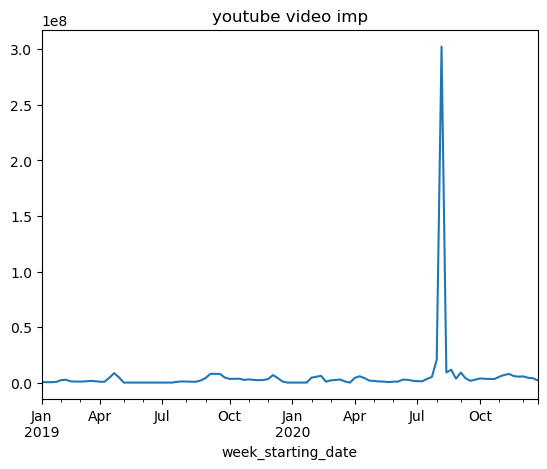

In [5]:
# This Python code generates a plot representing the total number of YouTube video impressions aggregated by week starting date. df_outlier.groupby('week_starting_date')['youtube_video_imp'].sum():
# This part of the code groups the DataFrame df_outlier by the 'week_starting_date' column and then calculates the sum of 'youtube_video_imp' impressions for each week starting date.
# .plot(title='youtube video imp'): This method call creates a plot of the grouped data, with 'week_starting_date' on the x-axis and the sum of YouTube video impressions on the y-axis.
# The title parameter sets the title of the plot to 'youtube video imp'.
# This Python code creates a graph showing the total number of YouTube video views, grouped by the week they started.
# The code first groups the data in the df_outlier DataFrame by the 'week_starting_date' column.
# Then, it calculates the total number of YouTube video views for each week.
# Finally, the code creates a plot of the grouped data. The x-axis of the plot shows the week starting date, and the y-axis shows the total number of YouTube video views for that week.
#The plot is titled 'youtube video imp'.

df_outlier.groupby('week_starting_date')['youtube_video_imp'].sum().plot(title='youtube video imp')

## Detect and Adjust Impressions data that can be deemed an outlier

In [6]:
# This Python code calculates a value to identify extreme high values (outliers) in the count of YouTube video impressions ("youtube_video_imp") in the DataFrame named "df_outlier."
# "var_mean": This calculates the average number of video impressions for rows with positive impression counts.
# "var_std": This calculates the standard deviation of video impressions for rows with positive impression counts, representing how spread out the data is.
# "high_outlier": This calculates a threshold to identify outliers by adding two standard deviations to the mean.
# Data points above this threshold are considered high outliers, indicating unusually high impression counts.
#The "print(high_outlier)" line displays the threshold for values that are significantly higher than the average ("high outliers").
# This code section analyzes YouTube video impressions, determining a benchmark for exceptional instances ("high outliers") using the average and deviation of the impressions.

var_mean = df_outlier.loc[df_outlier['youtube_video_imp']>0]['youtube_video_imp'].mean()

var_std = df_outlier.loc[df_outlier['youtube_video_imp']>0]['youtube_video_imp'].std()

high_outlier = var_mean + (2 * var_std)
print(high_outlier)

71281124.8598304


In [7]:
# This Python code picks out rows from the "df_outlier" DataFrame where the number of YouTube video impressions ("youtube_video_imp") is greater than a certain threshold ("high_outlier") that flags extreme values as outliers.
# The code helps find cases where the number of impressions is way higher than what's typically seen (based on the average and spread of the data), which could point to unusual events or outliers that may need a closer look to understand why the impression count is so high.

df_outlier[df_outlier['youtube_video_imp'] > high_outlier]

,week_starting_date,youtube_video_imp
83,2020-08-10,302536138.3


In [8]:
# Python code processes outliers in the 'youtube_video_imp' column of 'df_outlier'.
# Values exceeding the 'high_outlier' threshold are replaced with the 95th percentile value of the column for impressions below the threshold.
# 'np.where()' conditionally modifies 'youtube_video_imp'.
# If the value exceeds 'high_outlier', it's replaced by the 95th percentile value.
# Otherwise, the original value is kept. This code mitigates outliers' impact on analysis by replacing extreme values with a representative value derived from the data.

df_outlier['youtube_video_imp'] = np.where(df_outlier['youtube_video_imp'] > high_outlier,
                                           np.quantile(df_outlier[df_outlier['youtube_video_imp']< high_outlier]['youtube_video_imp'], .95),
                                           df_outlier['youtube_video_imp'])

In [9]:
# This Python code updates the DataFrame df_outlier's index to match the values in the 'week_starting_date' column.
# This action ensures that each DataFrame row has a unique identifier derived from the corresponding week's starting date.
# By indexing based on these dates, it becomes more straightforward to access and filter data according to time periods, enhancing the analysis and organization of time-series data.

df_outlier = df_outlier.set_index('week_starting_date')

## Plot impressions with outliers adjusted

<Axes: title={'center': 'Adjusted YouTube Video Impressions'}, xlabel='week_starting_date'>

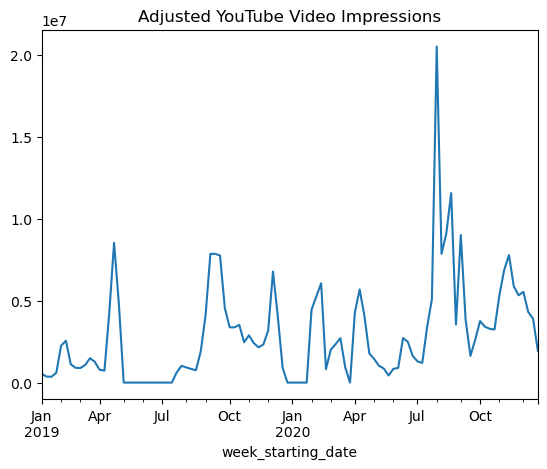

In [10]:
# the plot may take a few seconds to render
# STUDENT INPUT REQUIRED - Write the code that plots the adjusted impressions - HINT: Leverage other plotting code in this script

df_outlier['youtube_video_imp'].plot(title='Adjusted YouTube Video Impressions')


## Export processed data

In [11]:
df_outlier.to_csv(export_data_path + file_name)